The Model Developed for predicting the probability is a pretty straight forward one. In brief, the numercial data(scores in the Test) has been normalized (every column has been normalized to mean 0 and std 1). All the majors have been broadly classified into two major categories. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics, preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
raw_file_train=pd.read_csv('training.csv')

In [3]:
raw_file_test=pd.read_csv('test.csv')

In [4]:
raw_all_data=pd.concat((raw_file_train.loc[:,'Student ID':'BS'],raw_file_test.loc[:,'Student ID':'BS']))

In [5]:
for i in raw_file_train.index:
    if raw_file_train.loc[i,'WS'] == 'J':
        raw_file_train.loc[i,'WS'] = 1
    if raw_file_train.loc[i,'WS'] == 'K':
        raw_file_train.loc[i,'WS'] = 2
    if raw_file_train.loc[i,'WS'] == 'L':
        raw_file_train.loc[i,'WS'] = 3
    if raw_file_train.loc[i,'WS'] == 'M':
        raw_file_train.loc[i,'WS'] = 4
    if raw_file_train.loc[i,'WS'] == 'N':
        raw_file_train.loc[i,'WS'] = 5
    if raw_file_train.loc[i,'WS'] == 'O':
        raw_file_train.loc[i,'WS'] = 6
    if raw_file_train.loc[i,'WS'] == 'P':
        raw_file_train.loc[i,'WS'] = 7
    if raw_file_train.loc[i,'WS'] == 'Q':
        raw_file_train.loc[i,'WS'] = 8
    if raw_file_train.loc[i,'WS'] == 'R':
        raw_file_train.loc[i,'WS'] = 9
    if raw_file_train.loc[i,'WS'] == 'S':
        raw_file_train.loc[i,'WS'] = 10
    if raw_file_train.loc[i,'WS'] == 'T':
        raw_file_train.loc[i,'WS'] = 11

In [6]:
for i in raw_file_test.index:
    if raw_file_test.loc[i,'WS'] == 'J':
        raw_file_test.loc[i,'WS'] = 1
    if raw_file_test.loc[i,'WS'] == 'K':
        raw_file_test.loc[i,'WS'] = 2
    if raw_file_test.loc[i,'WS'] == 'L':
        raw_file_test.loc[i,'WS'] = 3
    if raw_file_test.loc[i,'WS'] == 'M':
        raw_file_test.loc[i,'WS'] = 4
    if raw_file_test.loc[i,'WS'] == 'N':
        raw_file_test.loc[i,'WS'] = 5
    if raw_file_test.loc[i,'WS'] == 'O':
        raw_file_test.loc[i,'WS'] = 6
    if raw_file_test.loc[i,'WS'] == 'P':
        raw_file_test.loc[i,'WS'] = 7
    if raw_file_test.loc[i,'WS'] == 'Q':
        raw_file_test.loc[i,'WS'] = 8
    if raw_file_test.loc[i,'WS'] == 'R':
        raw_file_test.loc[i,'WS'] = 9
    if raw_file_test.loc[i,'WS'] == 'S':
        raw_file_test.loc[i,'WS'] = 10
    if raw_file_test.loc[i,'WS'] == 'T':
        raw_file_test.loc[i,'WS'] = 11

In [7]:
processed_train=raw_file_train.drop(['MCAT Total'], axis=1)
processed_test=raw_file_test.drop(['MCAT Total','Probablitiy of acceptance'], axis=1)

In [8]:
processed_train_2=processed_train.ix[processed_train['Answer key'] <=2 ]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [9]:
processed_train_2["Undergrad Major Classification"]=""

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
major_categories=raw_all_data['Undergrad Major'].unique()
major_categories.sort()

In [11]:
major_categories

array(['African American Studies|Psychology',
       'African and African-American Studies', 'Anthropology',
       'Anthropology|Biology', 'Arabic', 'Art History',
       'Art History with Concentration in Architecture',
       'Art History|Biology', 'Asian and African Languages and Literature',
       'Asian and African Languages and Literature|Biology',
       'Asian and African Literature and Languages|Biology',
       'BAA (Biology, Anthropology and Anatomy)|French',
       'Biological Anthropology & Anatomy',
       'Biological Anthropology & Anatomy|Biology',
       'Biological Anthropology & Anatomy|Psychology',
       'Biological Anthropology & Anatomy|Sociology',
       'Biological Anthropology & Anatomy|Spanish',
       'Biological Anthropology and Anatmoy',
       'Biological Anthropology and Anatomy',
       'Biological Anthropology and Anatomy (BAA)',
       'Biological Anthropology and Anatomy|Biology',
       'Biological Anthropology and Anatomy|History',
       'Biolog

In [12]:
processed_train_2

Student ID                                    Undergrad Major  \
2          1003                                      Biology|Music   
12         1013                             Biomedical Engineering   
13         1014                                         Psychology   
15         1016                                            Biology   
16         1017                             Biomedical Engineering   
23         1024                                    Women's Studies   
26         1027                                            Biology   
27         1028                                            Biology   
28         1029                                            Biology   
29         1030      Biomedical Engineering|Electrical Engineering   
33         1034                             Biomedical Engineering   
35         1036                                            Biology   
36         1037                                          Economics   
37         1038                             Biomedical Engineering   
40         1041                                            Biology   
41         1042                                    Biology|Biology   
42         1043                                            Biology   
48         1049                                            Biology   
50         1051                                          Chemistry   
51         1052                                            Biology   
54         1055                Biological Anthropology and Anatomy   
59         1060      Biomedical Engineering|Mechanical Engineering   
60         1061                             Biomedical Engineering   
63         1064                             Biomedical Engineering   
70         1071                Biological Anthropology and Anatomy   
73         1074                                            Biology   
75         1076                                            Biology   
76         1077                                            History   
79         1080                                    Theater Studies   
81         1082                              Public Policy Studies   
..          ...                                                ...   
329        2139                                            Biology   
330        2140                                            Biology   
335        2145                                         Psychology   
339        2149                                        Mathematics   
340        2150                     Biology|Biomedical Engineering   
341        2151             International Comparative Area Studies   
345        2155                                            Biology   
348        2158                                            Biology   
349        2159                                         Psychology   
351        2161                             Biomedical Engineering   
352        2162                             Biomedical Engineering   
353        2163                             Biomedical Engineering   
354        2164                                            Biology   
356        2166                                            Biology   
357        2167                                          Economics   
358        2168                                            Biology   
359        2169                Biological Anthropology and Anatomy   
360        2170                                          Economics   
363        2173                                       Anthropology   
366        2176                                        Mathematics   
367        2177         Chemistry w/ concentration in Pharmacology   
368        2178                                            Biology   
369        2179                                            Biology   
371        2181                             Biomedical Engineering   
372        2182  Biology|Spanish and Latin American Studies|No ...   
373        2183

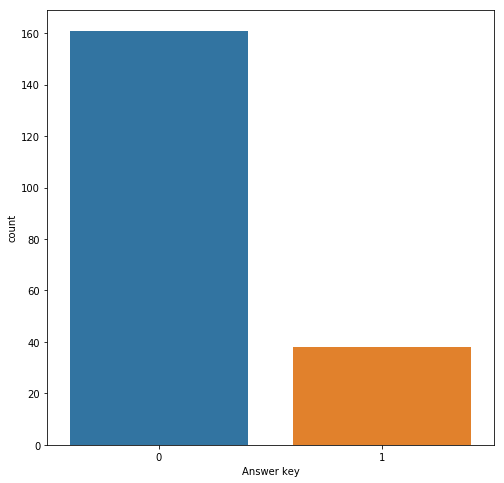

In [13]:
plt.subplots(figsize=(8,8))
sns.countplot(x='Answer key',data=processed_train_2)
plt.show()

In [14]:
table=pd.crosstab(processed_train_2['Undergrad Major'], processed_train_2['Answer key'])
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(15,8)) 

In [15]:
#Will need to categorize(classify) the majors into a few categories.
# Category 1:- Major accepted majors (Bio, Chemistry and Pyschology)
# Category 2:- All other Majors

In [16]:
for i in processed_train_2.index:
    if 'Bio' in processed_train_2.loc[i,'Undergrad Major'] or 'Chem' in processed_train_2.loc[i, 'Undergrad Major'] or 'Psy' in processed_train_2.loc[i, 'Undergrad Major']:
        processed_train_2.loc[i,'Undergrad Major Classification'] = 'Bio/Chem/Pys'
    else:
        processed_train_2.loc[i,'Undergrad Major Classification'] = 'Other'

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
processed_train_2

Student ID                                    Undergrad Major  \
2          1003                                      Biology|Music   
12         1013                             Biomedical Engineering   
13         1014                                         Psychology   
15         1016                                            Biology   
16         1017                             Biomedical Engineering   
23         1024                                    Women's Studies   
26         1027                                            Biology   
27         1028                                            Biology   
28         1029                                            Biology   
29         1030      Biomedical Engineering|Electrical Engineering   
33         1034                             Biomedical Engineering   
35         1036                                            Biology   
36         1037                                          Economics   
37         1038                             Biomedical Engineering   
40         1041                                            Biology   
41         1042                                    Biology|Biology   
42         1043                                            Biology   
48         1049                                            Biology   
50         1051                                          Chemistry   
51         1052                                            Biology   
54         1055                Biological Anthropology and Anatomy   
59         1060      Biomedical Engineering|Mechanical Engineering   
60         1061                             Biomedical Engineering   
63         1064                             Biomedical Engineering   
70         1071                Biological Anthropology and Anatomy   
73         1074                                            Biology   
75         1076                                            Biology   
76         1077                                            History   
79         1080                                    Theater Studies   
81         1082                              Public Policy Studies   
..          ...                                                ...   
329        2139                                            Biology   
330        2140                                            Biology   
335        2145                                         Psychology   
339        2149                                        Mathematics   
340        2150                     Biology|Biomedical Engineering   
341        2151             International Comparative Area Studies   
345        2155                                            Biology   
348        2158                                            Biology   
349        2159                                         Psychology   
351        2161                             Biomedical Engineering   
352        2162                             Biomedical Engineering   
353        2163                             Biomedical Engineering   
354        2164                                            Biology   
356        2166                                            Biology   
357        2167                                          Economics   
358        2168                                            Biology   
359        2169                Biological Anthropology and Anatomy   
360        2170                                          Economics   
363        2173                                       Anthropology   
366        2176                                        Mathematics   
367        2177         Chemistry w/ concentration in Pharmacology   
368        2178                                            Biology   
369        2179                                            Biology   
371        2181                             Biomedical Engineering   
372        2182  Biology|Spanish and Latin American Studies|No ...   
373        2183

In [18]:
processed_train_2=processed_train_2.drop(['Undergrad Major'],axis=1)

In [19]:
category_variables=['Undergrad Major Classification']
for var in category_variables:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(processed_train_2[var],prefix=var)
    raw_data1=processed_train_2.join(cat_list)
    processed_train_2=raw_data1

In [20]:
processed_train_2

Student ID  CU BCPM GPA  CU AO GPA  CU CUM GPA  VR  PS  WS  BS  \
2          1003         3.69       3.84        3.77  10  12   5  11   
12         1013         4.00       3.98        3.99  11  13   4  11   
13         1014         3.00       3.52        3.28   7   8   8  10   
15         1016         3.51       3.56        3.53  11  10   5  12   
16         1017         3.69       3.64        3.67  11  14   4  14   
23         1024         3.25       3.80        3.59  11  10   6  11   
26         1027         3.35       3.73        3.55  11  11   6  10   
27         1028         3.29       3.80        3.57  10  11   8  11   
28         1029         3.69       3.78        3.72   9  13   9  12   
29         1030         2.78       2.87        2.84  13  13   8  11   
33         1034         3.87       3.80        3.84  10   9   8  13   
35         1036         3.00       3.39        3.15  12  12   6  11   
36         1037         3.37       3.59        3.52  11  12   8  13   
37         1038         3.88       3.92        3.90  11  14   9  15   
40         1041         3.81       3.90        3.83  11  13  10  14   
41         1042         3.51       3.77        3.62   9  11   9  11   
42         1043         3.86       3.81        3.84   8  11   6  13   
48         1049         3.73       3.85        3.78   8  13   8  11   
50         1051         3.68       3.75        3.72  10   9   9  11   
51         1052         3.33       3.60        3.46  10  12   5  10   
54         1055         3.18       3.36        3.28   8  12   4  10   
59         1060         3.02       3.24        3.11   9  11   4  10   
60         1061         3.60       3.59        3.59   9  12   6  12   
63         1064         3.83       3.79        3.80  11  13   9  13   
70         1071         3.44       3.82        3.60  11  10   5  10   
73         1074         2.77       3.09        2.88   4   9   8   7   
75         1076         3.33       3.31        3.32   9  12  10  12   
76         1077         2.73       3.73        3.25   8   9   7   8   
79         1080         3.91       3.96        3.94  12  10   8  12   
81         1082         2.94       3.55        3.23  10  11   9  10   
..          ...          ...        ...         ...  ..  ..  ..  ..   
329        2139         2.95       3.64        3.26  13  10   9  11   
330        2140         3.91       3.88        3.90  12  12  10  14   
335        2145         3.26       3.59        3.38  11  10   9  12   
339        2149         3.19       3.72        3.44  11  12   8  12   
340        2150         3.92       3.93        3.92  12  13  10  12   
341        2151         3.66       3.90        3.82   9  10   6  10   
345        2155         3.00       3.50        3.20   9   9   8  13   
348        2158         3.49       3.61        3.53  11  13   8  15   
349        2159         3.41       3.44        3.42  11  12   6  12   
351        2161         3.90       3.83        3.86  11  14  10  12   
352        2162         2.62       3.57        3.26  12  11   6  12   
353        2163         3.55       3.45        3.50  11  10  11  12   
354        2164         3.87       3.91        3.89  10  11   8  12   
356        2166         3.81       3.85        3.83  13  10   7  15   
357        2167         3.11       3.72        3.51  13  12   8  11   
358        2168         3.56       3.73        3.64   9  12   9  13   
359        2169         3.83       3.81        3.83   8  12   8  12   
360        2170         3.47       3.72        3.63  11  12   6  12   
363        2173         3.02       3.63        3.43   9   8   6   9   
366        2176         3.05       3.65        3.25  10  12  10  10   
367        2177         3.35       3.74        3.49  14  12   8  10   
368        2178         3.72       3.86        3.78  10  13   9  12   
369        2179         3.98       4.00        3.99  10  12   6  12   
371        2181         3.84       3.69        3.75  12  12   8  12   
372        2182         3.48 

In [21]:
processed_train_2=processed_train_2.drop(['Undergrad Major Classification'],axis=1)

In [22]:
processed_train_2

Student ID  CU BCPM GPA  CU AO GPA  CU CUM GPA  VR  PS  WS  BS  \
2          1003         3.69       3.84        3.77  10  12   5  11   
12         1013         4.00       3.98        3.99  11  13   4  11   
13         1014         3.00       3.52        3.28   7   8   8  10   
15         1016         3.51       3.56        3.53  11  10   5  12   
16         1017         3.69       3.64        3.67  11  14   4  14   
23         1024         3.25       3.80        3.59  11  10   6  11   
26         1027         3.35       3.73        3.55  11  11   6  10   
27         1028         3.29       3.80        3.57  10  11   8  11   
28         1029         3.69       3.78        3.72   9  13   9  12   
29         1030         2.78       2.87        2.84  13  13   8  11   
33         1034         3.87       3.80        3.84  10   9   8  13   
35         1036         3.00       3.39        3.15  12  12   6  11   
36         1037         3.37       3.59        3.52  11  12   8  13   
37         1038         3.88       3.92        3.90  11  14   9  15   
40         1041         3.81       3.90        3.83  11  13  10  14   
41         1042         3.51       3.77        3.62   9  11   9  11   
42         1043         3.86       3.81        3.84   8  11   6  13   
48         1049         3.73       3.85        3.78   8  13   8  11   
50         1051         3.68       3.75        3.72  10   9   9  11   
51         1052         3.33       3.60        3.46  10  12   5  10   
54         1055         3.18       3.36        3.28   8  12   4  10   
59         1060         3.02       3.24        3.11   9  11   4  10   
60         1061         3.60       3.59        3.59   9  12   6  12   
63         1064         3.83       3.79        3.80  11  13   9  13   
70         1071         3.44       3.82        3.60  11  10   5  10   
73         1074         2.77       3.09        2.88   4   9   8   7   
75         1076         3.33       3.31        3.32   9  12  10  12   
76         1077         2.73       3.73        3.25   8   9   7   8   
79         1080         3.91       3.96        3.94  12  10   8  12   
81         1082         2.94       3.55        3.23  10  11   9  10   
..          ...          ...        ...         ...  ..  ..  ..  ..   
329        2139         2.95       3.64        3.26  13  10   9  11   
330        2140         3.91       3.88        3.90  12  12  10  14   
335        2145         3.26       3.59        3.38  11  10   9  12   
339        2149         3.19       3.72        3.44  11  12   8  12   
340        2150         3.92       3.93        3.92  12  13  10  12   
341        2151         3.66       3.90        3.82   9  10   6  10   
345        2155         3.00       3.50        3.20   9   9   8  13   
348        2158         3.49       3.61        3.53  11  13   8  15   
349        2159         3.41       3.44        3.42  11  12   6  12   
351        2161         3.90       3.83        3.86  11  14  10  12   
352        2162         2.62       3.57        3.26  12  11   6  12   
353        2163         3.55       3.45        3.50  11  10  11  12   
354        2164         3.87       3.91        3.89  10  11   8  12   
356        2166         3.81       3.85        3.83  13  10   7  15   
357        2167         3.11       3.72        3.51  13  12   8  11   
358        2168         3.56       3.73        3.64   9  12   9  13   
359        2169         3.83       3.81        3.83   8  12   8  12   
360        2170         3.47       3.72        3.63  11  12   6  12   
363        2173         3.02       3.63        3.43   9   8   6   9   
366        2176         3.05       3.65        3.25  10  12  10  10   
367        2177         3.35       3.74        3.49  14  12   8  10   
368        2178         3.72       3.86        3.78  10  13   9  12   
369        2179         3.98       4.00        3.99  10  12   6  12   
371        2181         3.84       3.69        3.75  12  12   8  12   
372        2182         3.48 

In [23]:
processed_train_2_x=pd.DataFrame(processed_train_2,columns=['CU BCPM GPA','CU AO GPA','CU CUM GPA','VR','PS','WS','BS','Undergrad Major Classification_Bio/Chem/Pys','Undergrad Major Classification_Other'])
processed_train_2_y=pd.DataFrame(processed_train_2,columns=['Answer key'])

In [24]:
processed_train_2_x['CU BCPM GPA']=(processed_train_2_x['CU BCPM GPA']-processed_train_2_x['CU BCPM GPA'].mean())/processed_train_2_x['CU BCPM GPA'].std()
processed_train_2_x['CU AO GPA']=(processed_train_2_x['CU AO GPA']-processed_train_2_x['CU AO GPA'].mean())/processed_train_2_x['CU AO GPA'].std()
processed_train_2_x['CU CUM GPA']=(processed_train_2_x['CU CUM GPA']-processed_train_2_x['CU CUM GPA'].mean())/processed_train_2_x['CU CUM GPA'].std()
processed_train_2_x['VR']=(processed_train_2_x['VR']-processed_train_2_x['VR'].mean())/processed_train_2_x['VR'].std()
processed_train_2_x['PS']=(processed_train_2_x['PS']-processed_train_2_x['PS'].mean())/processed_train_2_x['PS'].std()
processed_train_2_x['WS']=(processed_train_2_x['WS']-processed_train_2_x['WS'].mean())/processed_train_2_x['WS'].std()
processed_train_2_x['BS']=(processed_train_2_x['BS']-processed_train_2_x['BS'].mean())/processed_train_2_x['BS'].std()   

In [25]:
lin_reg=linear_model.LinearRegression().fit(processed_train_2_x, processed_train_2_y)

In [26]:
processed_test

Student ID                                    Undergrad Major  \
0          3001                                         Psychology   
1          3002                Biological Anthropology and Anatomy   
2          3003                                            Biology   
3          3004                             Biomedical Engineering   
4          3005                Biological Anthropology and Anatomy   
5          3006                                            Physics   
6          3007                             Biomedical Engineering   
7          3008                              Environmental Studies   
8          3009                             Biomedical Engineering   
9          3010                                         Psychology   
10         3011                                            Biology   
11         3012                                            Biology   
12         3013                                            Biology   
13         3014                          Psychology - Neuroscience   
14         3015                                          Chemistry   
15         3016                                  Political Science   
16         3017                                            Biology   
17         3018       Psychology (with Neuroscience concentration)   
18         3019                                            History   
19         3020  Biomedical Engineering|Computer Science|Electr...   
20         3021                                          Economics   
21         3022                                          Chemistry   
22         3023                                            Biology   
23         3024                                            Biology   
24         3025                                            Biology   
25         3026                                         Psychology   
26         3027                                            Biology   
27         3028                                            Biology   
28         3029                                            Biology   
29         3030           Biology|Spanish & Latin American Studies   
..          ...                                                ...   
351        3352                                            Biology   
352        3353                                          Chemistry   
353        3354                                         Psychology   
354        3355                                            Biology   
355        3356                                            Biology   
356        3357                Biological Anthropology and Anatomy   
357        3358                            Neuroscience|Psychology   
358        3359                                            Biology   
359        3360  PII: Global Perspectives on Development and He...   
360        3361                                          Chemistry   
361        3362                          Evolutionary Anthropology   
362        3363                                   Biology|Classics   
363        3364                                         Psychology   
364        3365                Biology, Pharmacology concentration   
365        3366                Biological Anthropology and Anatomy   
366        3367                                            Biology   
367        3368                                            Biology   
368        3369                Biological Anthropology and Anatomy   
369        3370                Biological Anthropology and Anatomy   
370        3371                                            Biology   
371        3372                                            Biology   
372        3373                                         Psychology   
373        3374                                         Psychology   
374        3375                                            Biology   
375        3376                                         Philosophy   
376        3377

In [27]:
for i in processed_test.index:
    if 'Bio' in processed_test.loc[i,'Undergrad Major'] or 'Chem' in processed_test.loc[i, 'Undergrad Major'] or 'Psy' in processed_test.loc[i, 'Undergrad Major']:
        processed_test.loc[i,'Undergrad Major Classification'] = 'Bio/Chem/Pys'
    else:
        processed_test.loc[i,'Undergrad Major Classification'] = 'Other'

In [28]:
processed_test=processed_test.drop(['Undergrad Major'],axis=1)

In [29]:
category_variables=['Undergrad Major Classification']
for var in category_variables:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(processed_test[var],prefix=var)
    raw_data1=processed_test.join(cat_list)
    processed_test=raw_data1

In [30]:
processed_test=processed_test.drop(['Undergrad Major Classification'],axis=1)

In [31]:
processed_test_x=pd.DataFrame(processed_test,columns=['CU BCPM GPA','CU AO GPA','CU CUM GPA','VR','PS','WS','BS','Undergrad Major Classification_Bio/Chem/Pys','Undergrad Major Classification_Other'])

In [32]:
processed_test_x['CU BCPM GPA']=(processed_test_x['CU BCPM GPA']-processed_test_x['CU BCPM GPA'].mean())/processed_test_x['CU BCPM GPA'].std()
processed_test_x['CU AO GPA']=(processed_test_x['CU AO GPA']-processed_test_x['CU AO GPA'].mean())/processed_test_x['CU AO GPA'].std()
processed_test_x['CU CUM GPA']=(processed_test_x['CU CUM GPA']-processed_test_x['CU CUM GPA'].mean())/processed_test_x['CU CUM GPA'].std()
processed_test_x['VR']=(processed_test_x['VR']-processed_test_x['VR'].mean())/processed_test_x['VR'].std()
processed_test_x['PS']=(processed_test_x['PS']-processed_test_x['PS'].mean())/processed_test_x['PS'].std()
processed_test_x['WS']=(processed_test_x['WS']-processed_test_x['WS'].mean())/processed_test_x['WS'].std()
processed_test_x['BS']=(processed_test_x['BS']-processed_test_x['BS'].mean())/processed_test_x['BS'].std()   


In [33]:
lin_reg_predict=lin_reg.predict(processed_test_x)

In [34]:
for i in range(len(lin_reg_predict)):
    print(lin_reg_predict[i])

[ 0.26506182]
[ 0.21569417]
[ 0.015867]
[ 0.23435315]
[ 0.18225664]
[ 0.06456702]
[ 0.17817695]
[ 0.0043897]
[ 0.12027712]
[ 0.51885447]
[ 0.15409517]
[ 0.27539013]
[ 0.20143429]
[ 0.34414626]
[ 0.07777494]
[ 0.4175363]
[ 0.08946077]
[ 0.33633711]
[ 0.1347962]
[ 0.1794637]
[ 0.30920753]
[ 0.19053979]
[ 0.37918356]
[ 0.32557629]
[ 0.15193956]
[ 0.20706405]
[ 0.4154409]
[ 0.33775396]
[ 0.20714297]
[ 0.03741986]
[ 0.17858344]
[ 0.30801519]
[ 0.03599358]
[ 0.31183781]
[ 0.03220493]
[ 0.27062109]
[ 0.17993473]
[ 0.36763729]
[ 0.30610552]
[ 0.05268776]
[-0.08532648]
[ 0.12778321]
[ 0.4158246]
[ 0.05228021]
[ 0.21394553]
[ 0.1528831]
[ 0.1778418]
[ 0.10192797]
[ 0.16718871]
[ 0.33859899]
[ 0.36936335]
[-0.04134421]
[ 0.19568662]
[ 0.2080378]
[ 0.08751979]
[ 0.16206962]
[ 0.2323804]
[ 0.15606537]
[-0.03255825]
[ 0.0700485]
[ 0.27610196]
[ 0.04139835]
[ 0.2873029]
[ 0.36496362]
[ 0.15969953]
[ 0.14282321]
[ 0.27704617]
[ 0.18234383]
[ 0.12464343]
[ 0.22009579]
[-0.11386097]
[-0.06621142]
[ 0.09

In [35]:
from sklearn.ensemble import RandomForestRegressor


In [36]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(processed_train_2_x,processed_train_2_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [37]:
random_forest_predict = rf.predict(processed_test_x)

In [38]:
for i in range(len(random_forest_predict)):
    print(random_forest_predict[i])

0.203
0.484
0.018
0.027
0.446
0.177
0.263
0.016
0.088
0.712
0.27
0.6
0.273
0.734
0.084
0.256
0.021
0.47
0.145
0.071
0.159
0.119
0.199
0.562
0.309
0.035
0.601
0.461
0.126
0.067
0.281
0.464
0.037
0.557
0.008
0.438
0.106
0.403
0.174
0.038
0.007
0.061
0.261
0.0
0.045
0.052
0.105
0.226
0.223
0.515
0.457
0.001
0.061
0.183
0.056
0.2
0.091
0.023
0.173
0.006
0.342
0.045
0.529
0.268
0.262
0.12
0.37
0.142
0.146
0.057
0.045
0.015
0.015
0.408
0.567
0.105
0.563
0.125
0.321
0.072
0.426
0.082
0.025
0.068
0.224
0.483
0.663
0.068
0.035
0.156
0.253
0.048
0.083
0.304
0.037
0.012
0.179
0.024
0.578
0.091
0.003
0.124
0.433
0.048
0.523
0.008
0.033
0.28
0.178
0.345
0.673
0.476
0.056
0.486
0.012
0.037
0.345
0.233
0.058
0.204
0.03
0.163
0.538
0.009
0.648
0.0
0.195
0.081
0.448
0.105
0.163
0.005
0.075
0.087
0.321
0.16
0.342
0.446
0.389
0.195
0.304
0.003
0.062
0.294
0.386
0.436
0.359
0.043
0.528
0.108
0.332
0.21
0.289
0.087
0.012
0.067
0.445
0.122
0.536
0.461
0.271
0.021
0.126
0.761
0.083
0.137
0.055
0.043
0.396
0.

In [39]:
log_reg=linear_model.LogisticRegression().fit(processed_train_2_x, processed_train_2_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
log_reg_predict=log_reg.predict(processed_test_x)

In [41]:
for i in range(len(log_reg_predict)):
    print(log_reg_predict[i])

0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [42]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [43]:
clf.fit(processed_train_2_x, processed_train_2_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [44]:
neural_net_predict=clf.predict(processed_test_x)

In [45]:
for i in range(len(neural_net_predict)):
    print(neural_net_predict[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
